# Ensemble Learning: Random Forest

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [26]:
# load data
os.chdir('C:/Users/Mayin\Documents/1GRADUATE/1. Study/2. 24Spring/5291 Aadvanced Statistical Analysis/5291 Project/')
x_train = pd.read_csv('x_train_scale.csv').drop(['subject#'], axis=1)
y_train = pd.read_csv('y_train_scale.csv')
x_test = pd.read_csv('x_test_scale.csv').drop(['subject#'], axis=1)
y_test = pd.read_csv('y_test_scale.csv')

In [27]:
# 2 responses
y_t_train = y_train['total_UPDRS']
y_t_test = y_test['total_UPDRS']
y_m_train = y_train['motor_UPDRS']
y_m_test = y_test['motor_UPDRS']

### Total_UPDRS

In [37]:
seed = 5291
# Candidate paramters gird
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [20, 30, 40, 50],
}
rf = RandomForestRegressor()
print(1)
# Grid search: 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
print(2)
grid_search.fit(x_train, y_t_train)

print(grid_search.best_params_)

1
2
{'max_depth': 40, 'n_estimators': 250}


R^2:  0.9589947914512823
Mean Squared Error test:  0.04172790594701804
Mean Squared Error train:  0.0034217244112110675


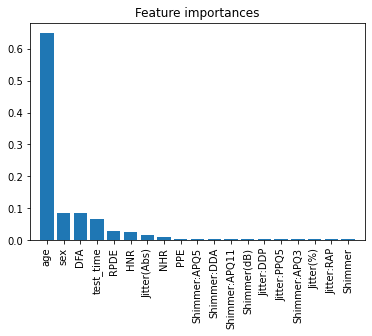

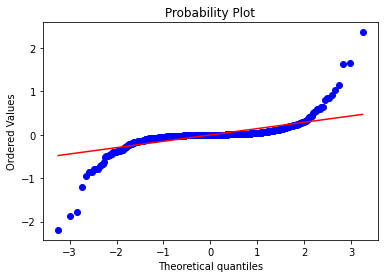

In [38]:
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Prediction using the best parameters
y_pred = grid_search.predict(x_test)

#R^2, MSE
print('R^2: ', r2_score(y_t_test, y_pred))
print('Mean Squared Error test: ', mean_squared_error(y_t_test, y_pred))
print('Mean Squared Error train: ', mean_squared_error(y_t_train, grid_search.predict(x_train)))

# plot importance score of features
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
x_name = x_train.columns[indices]
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_name, rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# Q-Q Plot
stats.probplot(y_t_test - y_pred, dist="norm", plot=plt)
plt.show()



In [32]:
# Breusch-Pagan
_, lm_pvalue, _, p2 = sm.stats.diagnostic.het_breuschpagan(y_t_test - y_pred, x_test)
print('Breusch-Pagan test p-value: ', lm_pvalue)

Breusch-Pagan test p-value:  0.03154786801580742


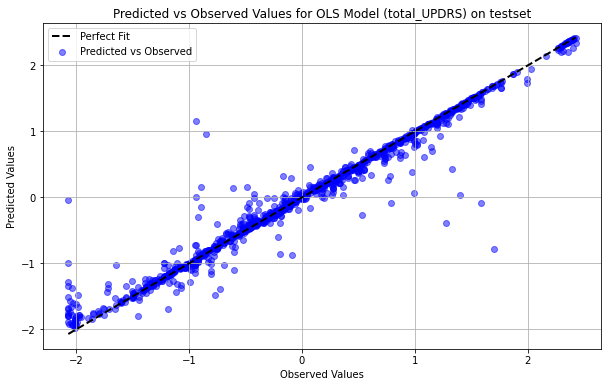

In [31]:
# plot test
y_pred = y_pred
y_actual = y_t_test
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_pred, alpha=0.5, color='blue', label='Predicted vs Observed')  # Plotting the points

# Plot the line of perfect prediction
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2, label='Perfect Fit')  # Line from min to max of observed

# Labeling the axes
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Observed Values for OLS Model (total_UPDRS) on testset')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

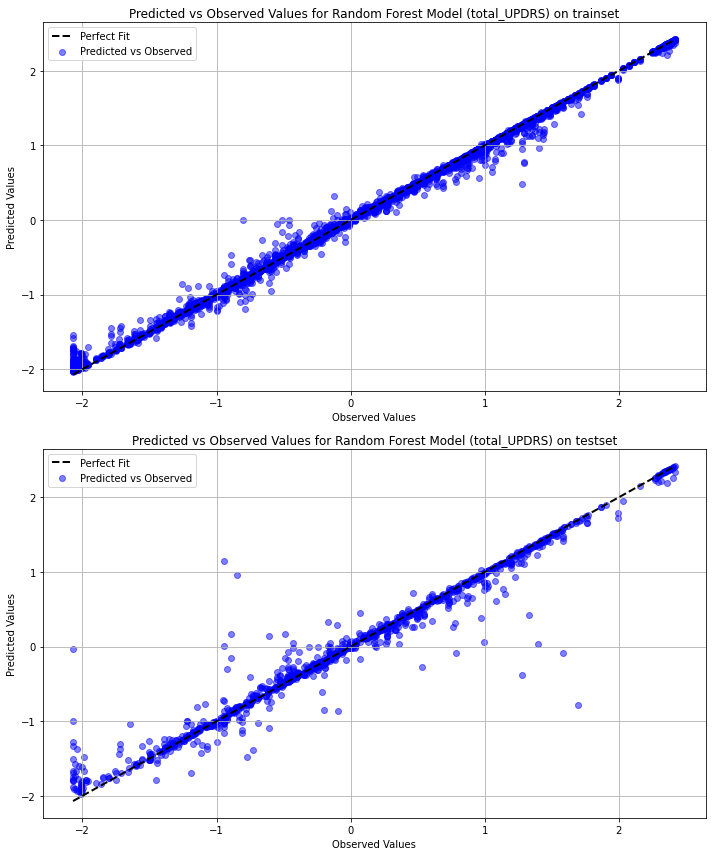

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
y_rf_pred_train = grid_search.predict(x_train)
y_rf_pred_test = grid_search.predict(x_test)

# subplot1: trainset
axs[0].scatter(y_t_train, y_rf_pred_train, alpha=0.5, color='blue', label='Predicted vs Observed')
axs[0].plot([y_t_train.min(), y_t_train.max()], [y_t_train.min(), y_t_train.max()], 'k--', lw=2, label='Perfect Fit')
axs[0].set_xlabel('Observed Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Predicted vs Observed Values for Random Forest Model (total_UPDRS) on trainset')
axs[0].legend()
axs[0].grid(True)

# subplot2: testset
axs[1].scatter(y_t_test, y_rf_pred_test, alpha=0.5, color='blue', label='Predicted vs Observed')
axs[1].plot([y_t_test.min(), y_t_test.max()], [y_t_test.min(), y_t_test.max()], 'k--', lw=2, label='Perfect Fit')
axs[1].set_xlabel('Observed Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_title('Predicted vs Observed Values for Random Forest Model (total_UPDRS) on testset')
axs[1].legend()
axs[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()